<a href="https://colab.research.google.com/github/bayuzen19/Business-Inteligence-Batch-3/blob/main/Time_Series_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install sktime[all_extras]

In [ ]:
# utilities packages
import datetime
import os

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
# load sktime for time series forecasting

from sktime.utils.plotting import plot_series # from plotting
from sktime.forecasting.naive import NaiveForecaster # for naive forecasting
from sktime.forecasting.arima import AutoARIMA # for automated ARIMA forecasting
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # for exponential smoothing forecasting
from sktime.forecasting.ets import AutoETS # for automated ETS forecasting 
from sktime.forecasting.tbats import TBATS # for TBATS forecasting
from sktime.forecasting.fbprophet import Prophet # for Prophet forecasting
from sktime.forecasting.base import ForecastingHorizon # for creating forecast horizon
from sktime.forecasting.model_selection import (
    temporal_train_test_split, 
    ExpandingWindowSplitter, 
    SlidingWindowSplitter
) # for train-test split and cross validation
from sktime.performance_metrics.forecasting import (
    mean_absolute_error, 
    mean_squared_error, 
    mean_absolute_percentage_error
) # for evaluation metrics
from sktime.forecasting.model_evaluation import evaluate # for evaluating CV results

%matplotlib inline
import warnings
sns.set_style("ticks")
sns.set(font_scale = 1.5)

In [ ]:
#import data
df_1 = pd.read_csv("/content/drive/MyDrive/Business Intelligence Dibimbing/task_1_1.csv")
df_2 = pd.read_csv("/content/drive/MyDrive/Business Intelligence Dibimbing/task_1_2.csv")
df_3 = pd.read_csv("/content/drive/MyDrive/Business Intelligence Dibimbing/task_1_3.csv")
df_4 = pd.read_csv("/content/drive/MyDrive/Business Intelligence Dibimbing/task_1_4.csv")
df_5 = pd.read_csv("/content/drive/MyDrive/Business Intelligence Dibimbing/task_1_5.csv")
df_6 = pd.read_csv("/content/drive/MyDrive/Business Intelligence Dibimbing/task_1_6.csv")
df_7 = pd.read_csv("/content/drive/MyDrive/Business Intelligence Dibimbing/task_1_7.csv")
df_8 = pd.read_csv("/content/drive/MyDrive/Business Intelligence Dibimbing/task_1_8.csv")
df_9 = pd.read_csv("/content/drive/MyDrive/Business Intelligence Dibimbing/task_1_9.csv")
df_10 = pd.read_csv("/content/drive/MyDrive/Business Intelligence Dibimbing/task_1_10.csv")

# Data 1

In [ ]:
df_1 = df_1.set_index("index")
df_1.head()

,value
index,
101,1.323913
102,1.197747
103,-0.951691
104,1.904784
105,-0.551699


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

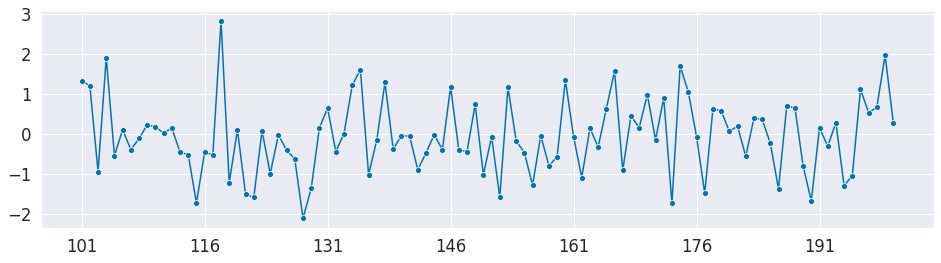

In [ ]:
plot_series(df_1)

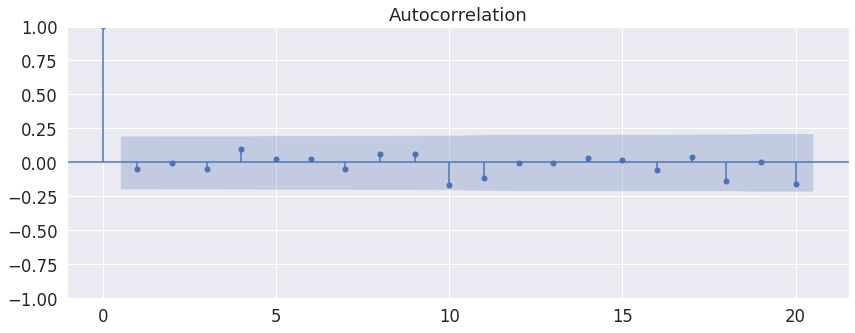

In [ ]:
plot_acf(df_1).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


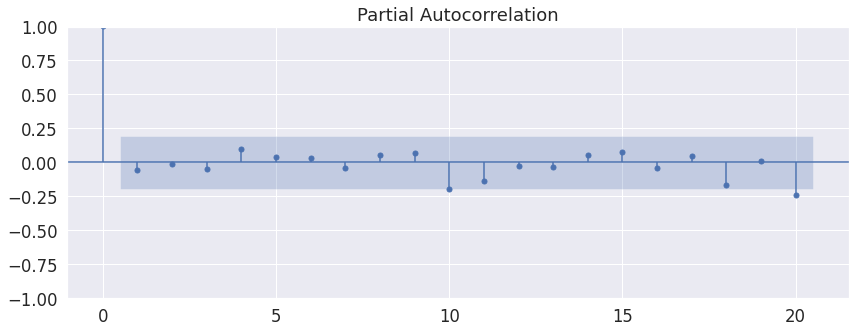

In [ ]:
plot_pacf(df_1).set_size_inches((14,5));

In [ ]:
#uji stationer
# define adf_test function
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [ ]:
adf_test(df_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.048554e+01
p-value                        1.183064e-18
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


Observasi : <br>
1.trend plot stationarity berdasarkan uji dicky fuller. <br>
2.tidak terdapat lag pada acf dan pacf sehingga dapat dikatakan modelnya adalah noise ARIMA(0,0,0)

# Data 2

In [ ]:
df_2 = df_2.set_index("index")

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

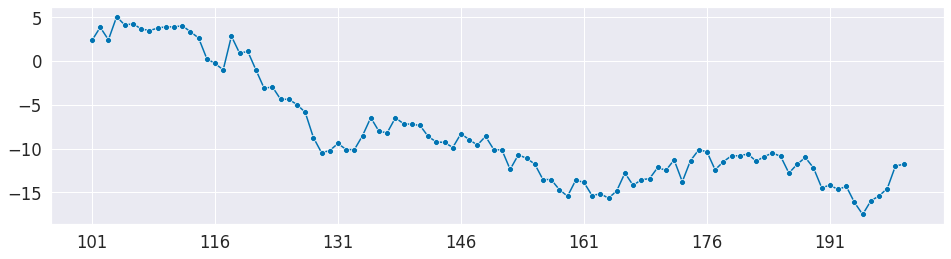

In [ ]:
plot_series(df_2)

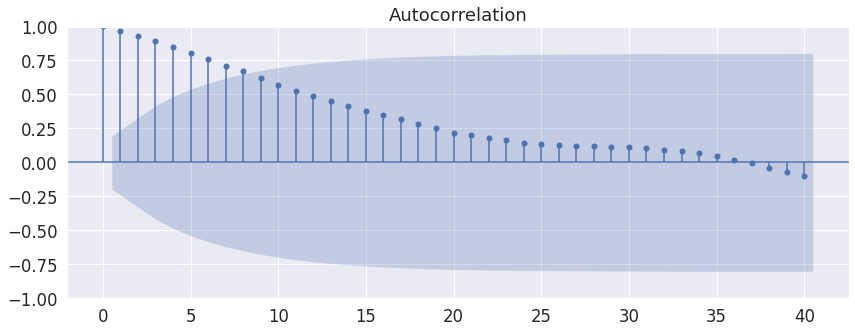

In [ ]:
plot_acf(df_2,lags=40).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


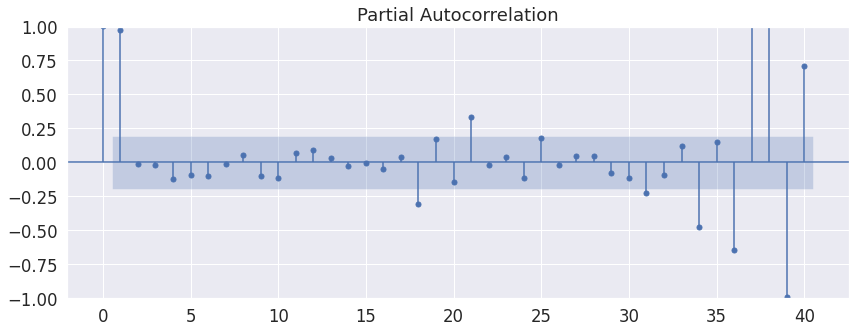

In [ ]:
plot_pacf(df_2,lags=40).set_size_inches((14,5));

In [ ]:
#uji stationer
adf_test(df_2)

Results of Dickey-Fuller Test:
Test Statistic                 -1.639494
p-value                         0.462525
#Lags Used                      0.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


Observasi : <br>
1.trend plot mengalami trend turun, berdasarkan uji dicky fuller tidak stationarity karena p-value > 0.05. <br>
2.Plot acf menunjukkan adanya exponensial decay. <br>
3.Karena tidak stationer maka perlu dilakukan differencing

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

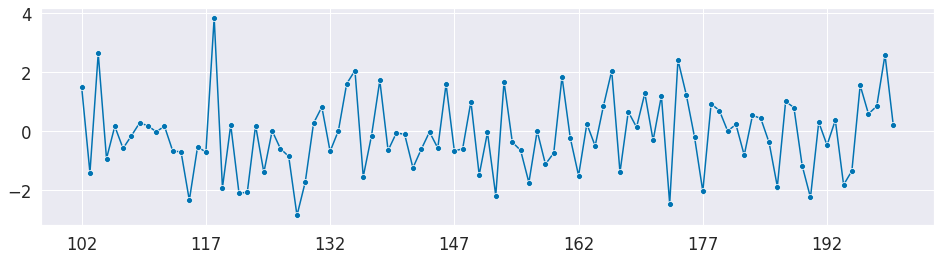

In [ ]:
#difference orde 1
df_2_ord_1 = df_2.diff().dropna()
plot_series(df_2_ord_1)

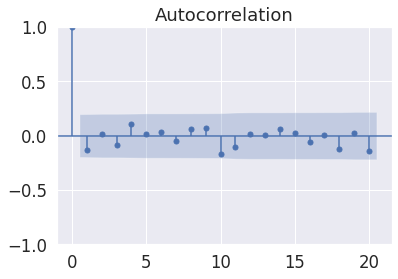

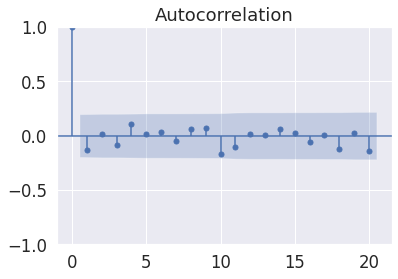

In [ ]:
#difference orde 1
plot_acf(df_2_ord_1)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


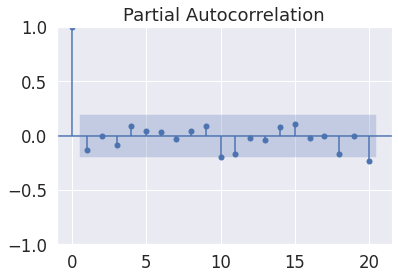

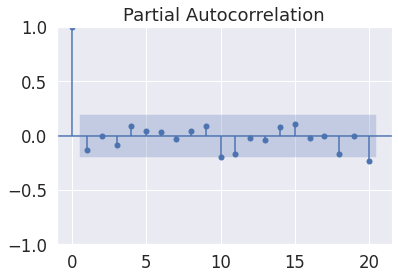

In [ ]:
plot_pacf(df_2_ord_1)

In [ ]:
adf_test(df_2_ord_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.126740e+01
p-value                        1.567163e-20
#Lags Used                     0.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64


dari hasil differenciaci orde 1, plot series telah stasiner dengan hasil uji dicky fuller p-value kecil dari 0.05, karena tidak terdapat lag pada acf dan pacf atau ARIMA(0,1,0) maka dapat dikatakan model yang sesuai adalah random walk

# Data 3

In [ ]:
df_3 = df_3.set_index("index")
df_3.head()

,value
index,
101,-1.405059
102,0.471055
103,-0.006376
104,1.030057
105,0.207344


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

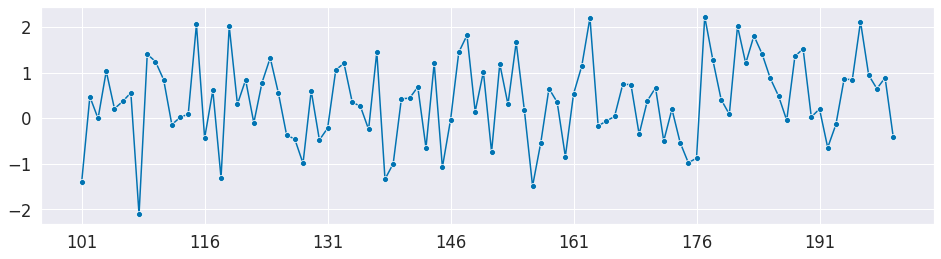

In [ ]:
plot_series(df_3)

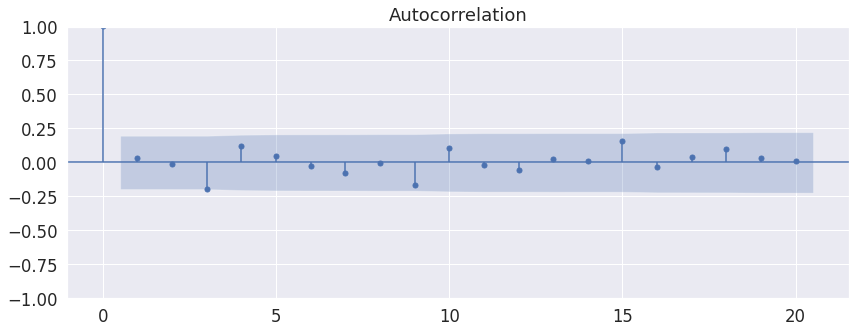

In [ ]:
plot_acf(df_3).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


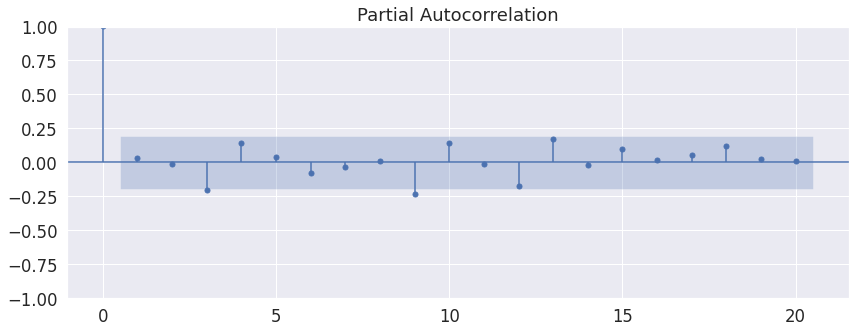

In [ ]:
plot_pacf(df_3).set_size_inches((14,5));

In [ ]:
#uji stasioner
adf_test(df_3)

Results of Dickey-Fuller Test:
Test Statistic                 -4.791928
p-value                         0.000056
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


Observasi : <br>
1.Plot series tidak menunjukan sebuah trend dan dari hasil uji dicky fuller trend telah stasioner. <br>
2.Tidak terdapat lag pada acf dan pacf, dilihat dari plotnya juga tidak menunjukkan adanya pola tertentu, sehingga dapat dikatakan model yang sesuai adalah white noise atau ARIMA (0,0,0)

# Data 4

In [ ]:
df_4 = df_4.set_index('index')
df_4.head()

,value
index,
1 Jan,14.346754
1 Feb,14.877385
1 Mar,16.630073
1 Apr,18.742186
1 Mei,17.657716


In [ ]:
df_4 = df_4.reset_index(drop=True)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

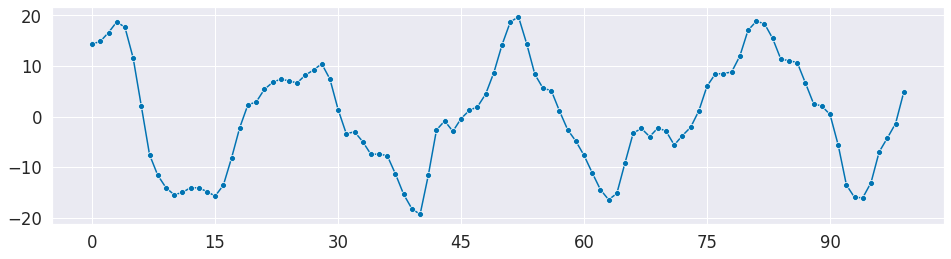

In [ ]:
plot_series(df_4)

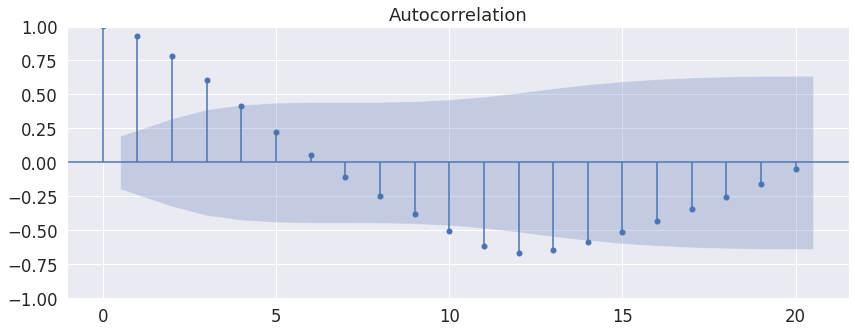

In [ ]:
plot_acf(df_4).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


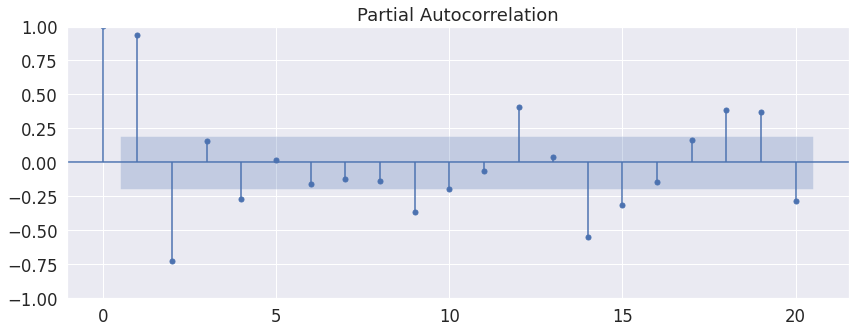

In [ ]:
plot_pacf(df_4).set_size_inches((14,5));

In [ ]:
adf_test(df_4)

Results of Dickey-Fuller Test:
Test Statistic                 -2.410236
p-value                         0.138868
#Lags Used                     11.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


Observasi : <br>
1.Data memiliki trend yang cyclic, dari hasil uji dicky fuller data tidak stationer. <br>
2.dari plot acf terdapat pola gelombang sehingga plot acf dapat di abaikan, sedangkan untuk plot pacf memiliki lag pada lag 2. <br>
3.perlu dilakukan differencing untuk membuat data menjadi stationer

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

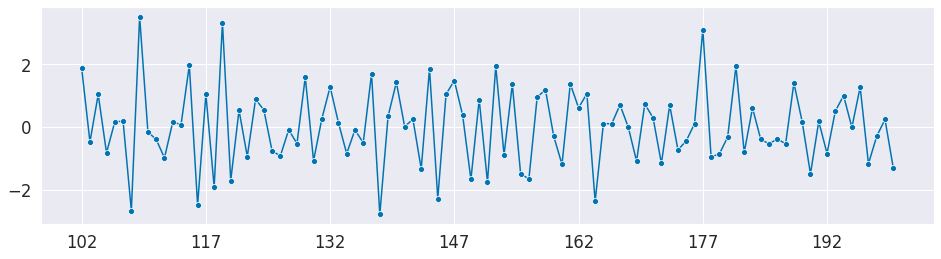

In [ ]:
#difference orde 1
df_3_ord_1  = df_3.diff().dropna()

plot_series(df_3_ord_1)

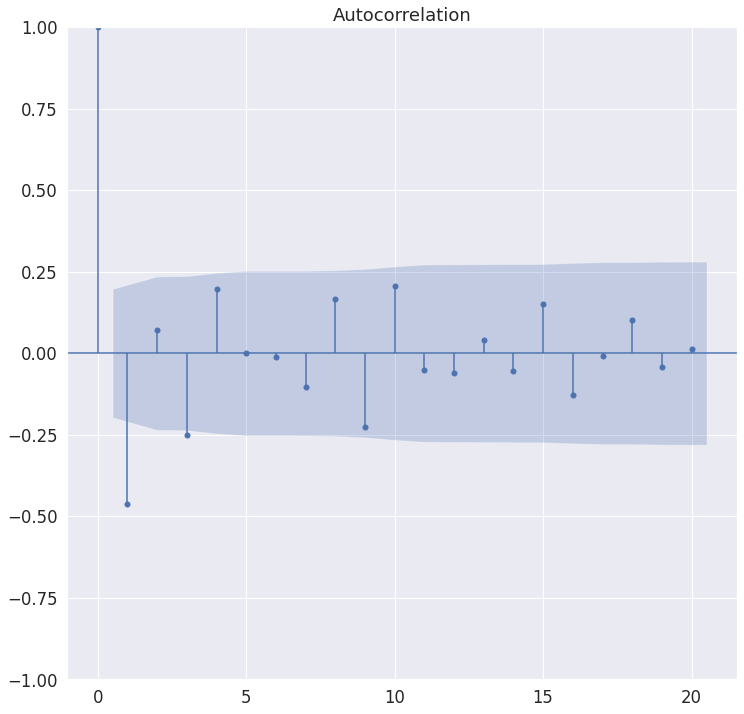

In [ ]:
plot_acf(df_3_ord_1).set_size_inches(12,12);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


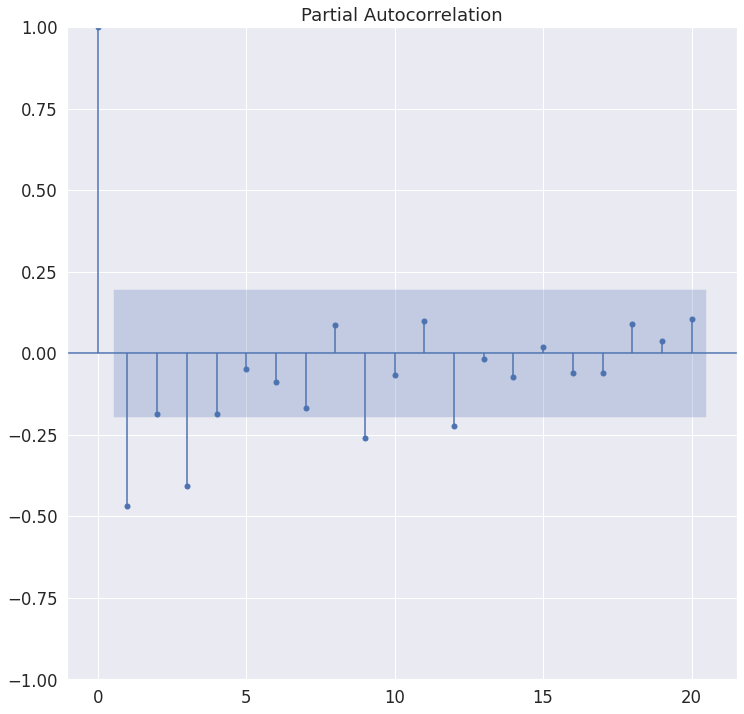

In [ ]:
plot_pacf(df_3_ord_1).set_size_inches(12,12);

In [ ]:
adf_test(df_3_ord_1)

Results of Dickey-Fuller Test:
Test Statistic                 -4.914091
p-value                         0.000033
#Lags Used                     11.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


Observasi : <br>
1.setelah dilakukan differencing orde 1 didapatkan bahwa data tidak lagi memiliki trend cyclic dan dari hasil uji adf fuller menunjukkan data telah stationer. <br>
2.Dati plot acf terlihat terdapat korelasi pada lag 1 dan pada plot pacf terdapat korelasi negatif pada lag 1 juga, sehingga dapat dikatakan bahwa model yang cocok adalah ARIMA(1,1,1)

# Data 5

In [ ]:
df_5 = df_5.drop("index",axis=1)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

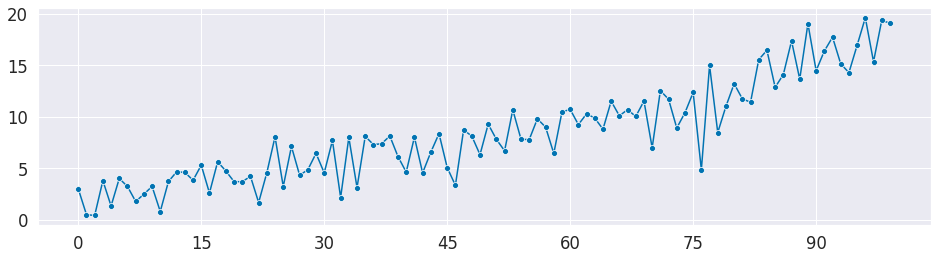

In [ ]:
plot_series(df_5)

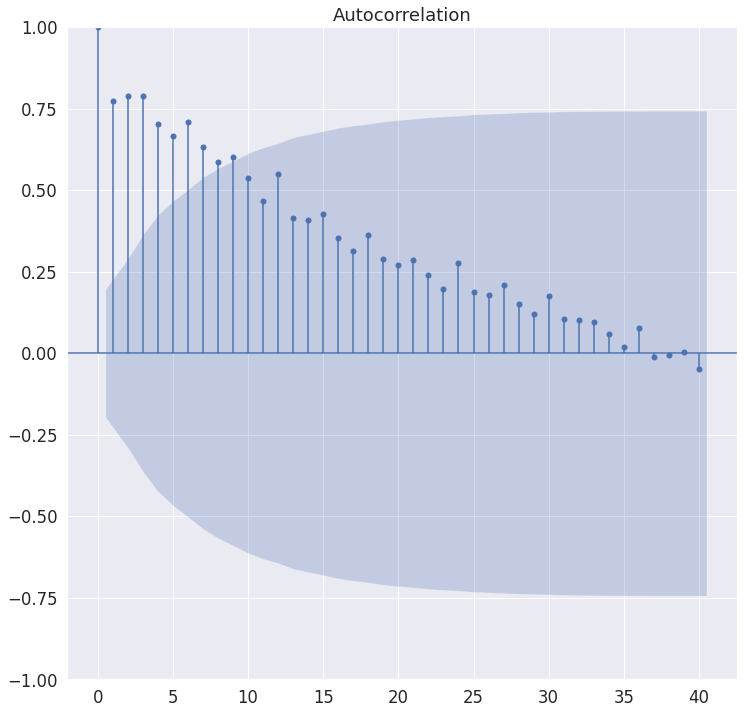

In [ ]:
plot_acf(df_5,lags=40).set_size_inches(12,12);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


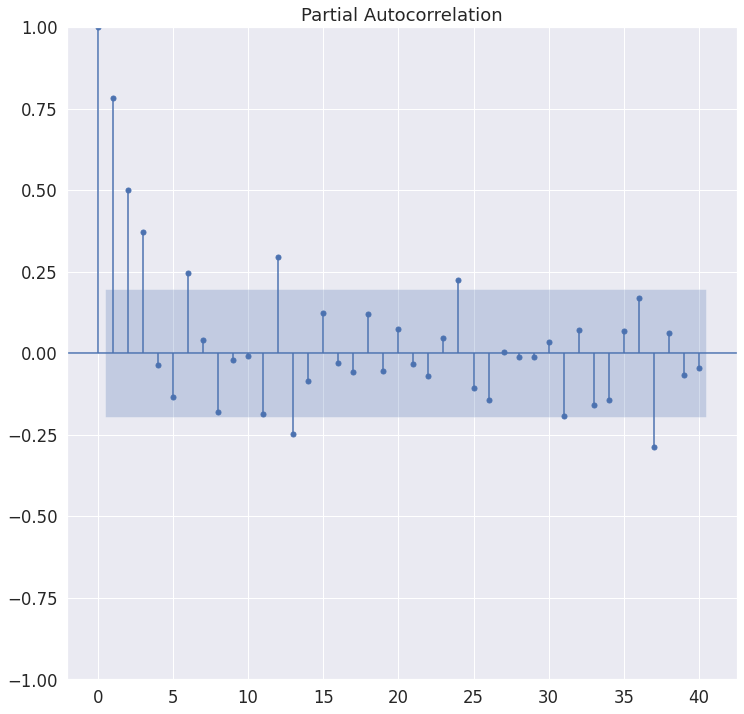

In [ ]:
plot_pacf(df_5,lags=40).set_size_inches(12,12);

In [ ]:
adf_test(df_5)

Results of Dickey-Fuller Test:
Test Statistic                  1.965343
p-value                         0.998626
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


1.trend pada data adalah trend naik, dari hasil uji adf fuller menunjukkan tidak stasioner. <br>
2.dari ploat acf terdapat pola exponential decay sehingga dapat diabaikan, sedangkan dari plot pacf memiliki lag pada lag 3. <br>
3.karena belum stationer maka perlu dilakukan differencing

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

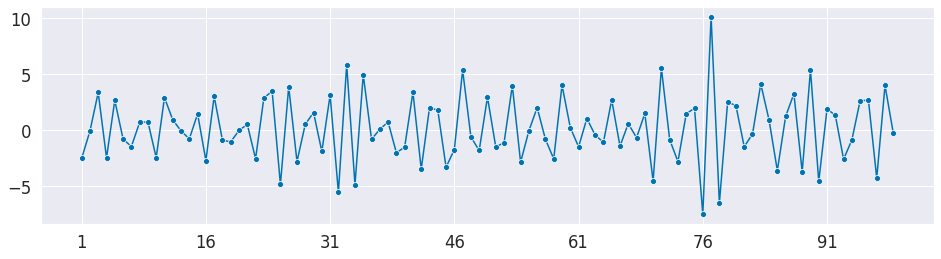

In [ ]:
#difference orde 1
df_5_ord_1 = df_5.diff().dropna()

plot_series(df_5_ord_1)

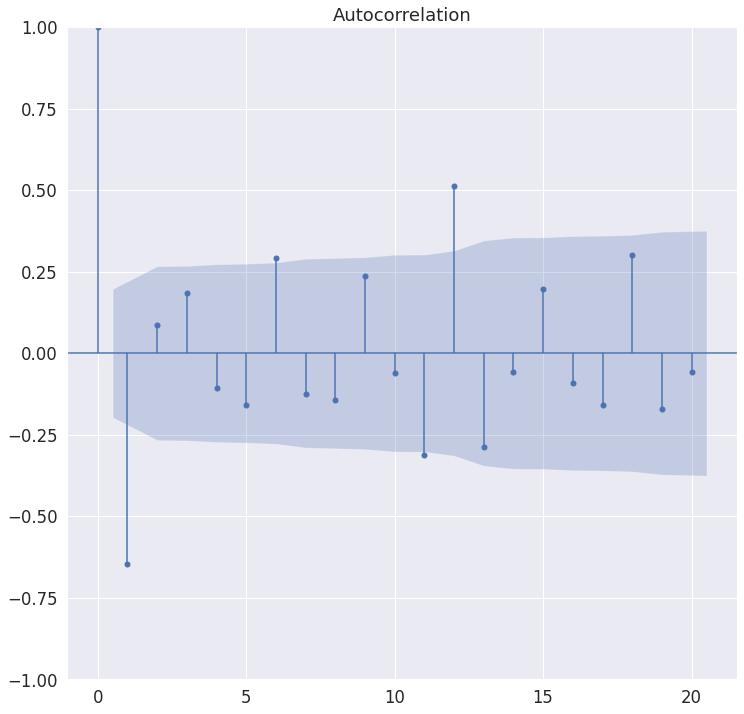

In [ ]:
plot_acf(df_5_ord_1).set_size_inches(12,12);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


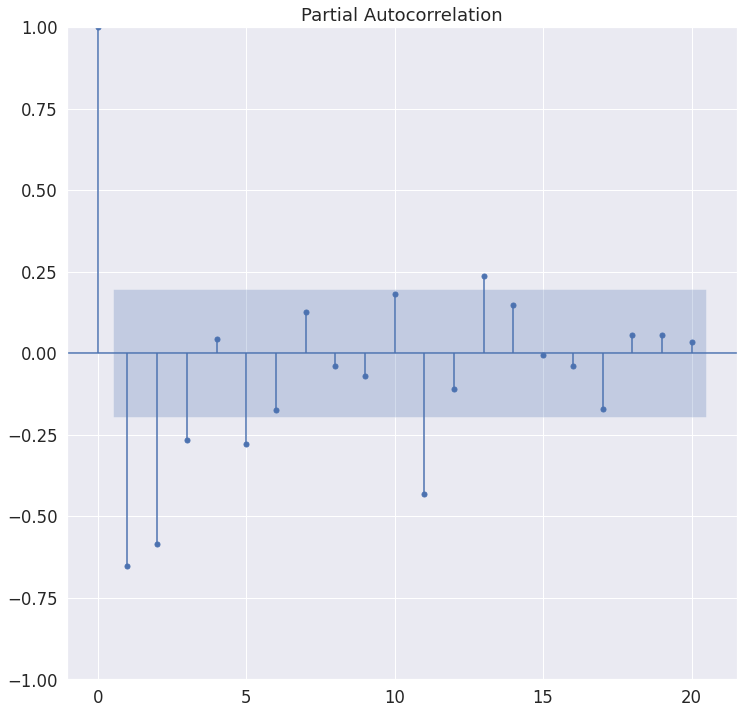

In [ ]:
plot_pacf(df_5_ord_1).set_size_inches(12,12);

In [ ]:
adf_test(df_5_ord_1)

Results of Dickey-Fuller Test:
Test Statistic                 -2.979359
p-value                         0.036867
#Lags Used                     12.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64


observasi <br>
1.data setelah diferencing orde 1 sudah tidak memiliki trend naik, berdasarkan uji dicky fuller trend telah staioner. <br>
2.plot acf tidak mengalami exponencyal decay dan memiliki korelasi pada lag 1, sedangkan plot pacf menunjukkan korelasi pada lag 3, sehingga dapat dikatakan model yang sesuai adalah ARIMA(3,1,1)

# Data 6

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

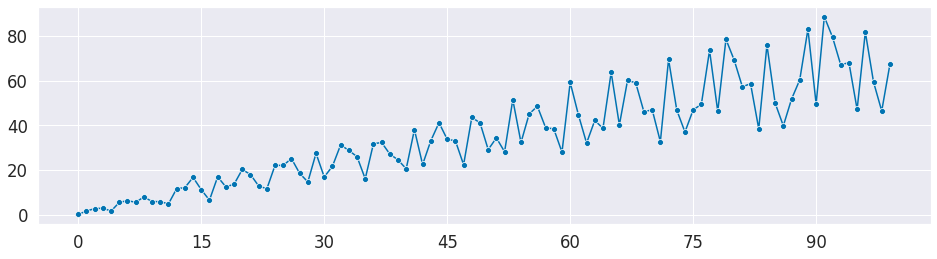

In [ ]:
df_6 = df_6.drop("index",axis=1)

plot_series(df_6)

terlihat bahwa trend meningkat dan mengalami ketidak stasioner pada rata rata sehingga pelu dilakukan transformasi

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

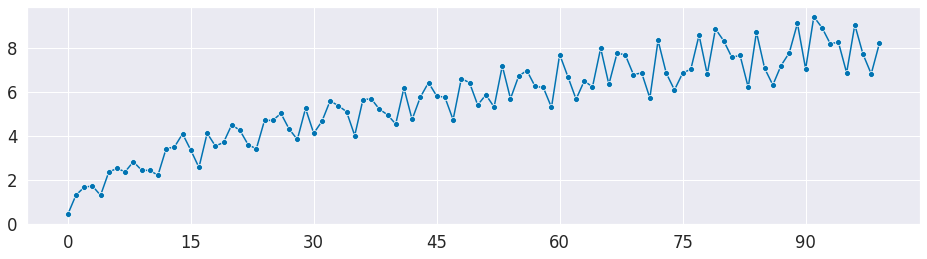

In [ ]:
#transformasi akar kuadrat
plot_series(np.sqrt(df_6))

dengan melakukan transformasi akar kuadrat terlihat data memiliki rata rata yang stasioner sehingga transformasi akar kuadrat akan digunakan

In [ ]:
df_6_trs = np.sqrt(df_6)

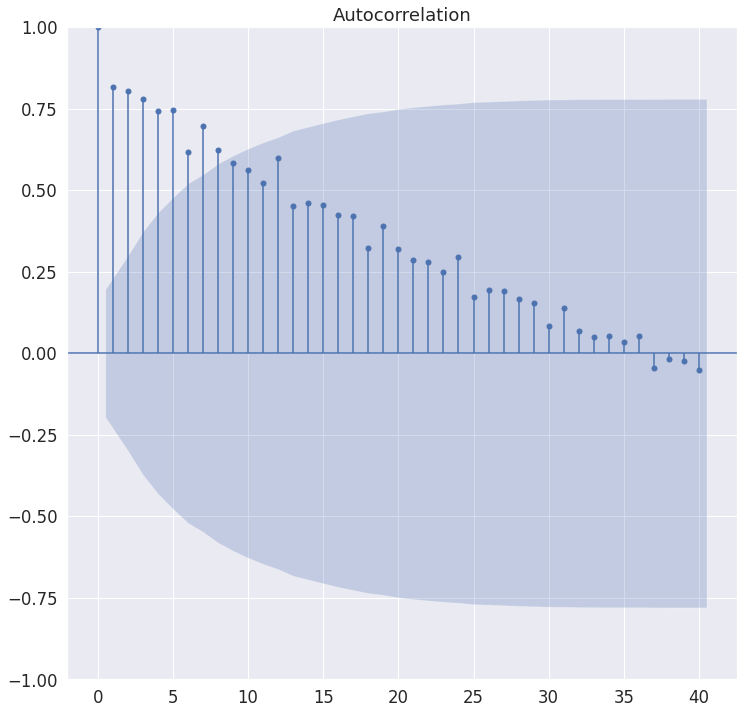

In [ ]:
plot_acf(df_6_trs,lags=40).set_size_inches(12,12);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


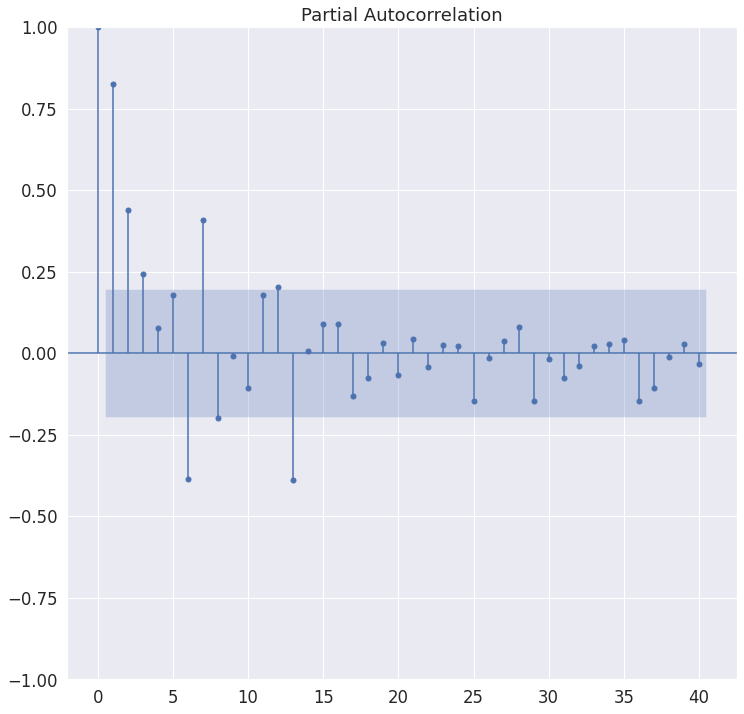

In [ ]:
plot_pacf(df_6_trs,lags=40).set_size_inches(12,12);

In [ ]:
adf_test(df_6_trs)

Results of Dickey-Fuller Test:
Test Statistic                 -3.745293
p-value                         0.003519
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


Observasi <br>
1. data yang telah di trnaformasi memiliki stationer berdasarkan uji fuller
2.terdapat pola exponensial decay pada acf sedangkan plot pacf menunjukkan korelasi terjadi pada lag 3 sehingga dapat dikatan model yang sesuai adalah AR(3)

# Data 7

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

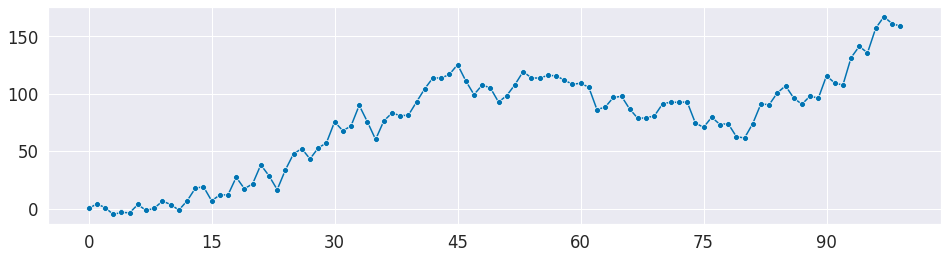

In [ ]:
df_7 = df_7.drop("index",axis=1)


plot_series(df_7)

terlihat bahwa adanya trend meningkat dan tidak stationer pada rata rata, perlu dilakukan transformasi

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

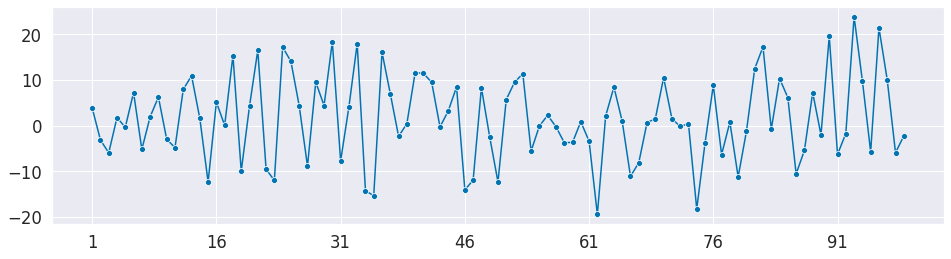

In [ ]:
#transformasi dengan differensiasi
df_7_ord_1 = df_7.diff().dropna()

plot_series(df_7_ord_1)

setelah dilakukan differensiasi orde 1, terlhiat bahwa data tidak lagi memiliki non stationarity pada rata rata

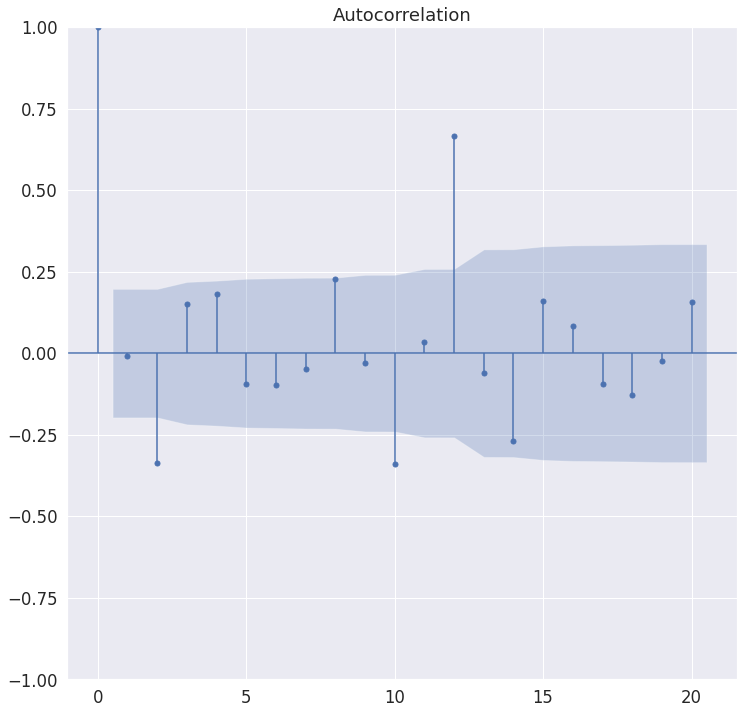

In [ ]:
plot_acf(df_7_ord_1).set_size_inches(12,12);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


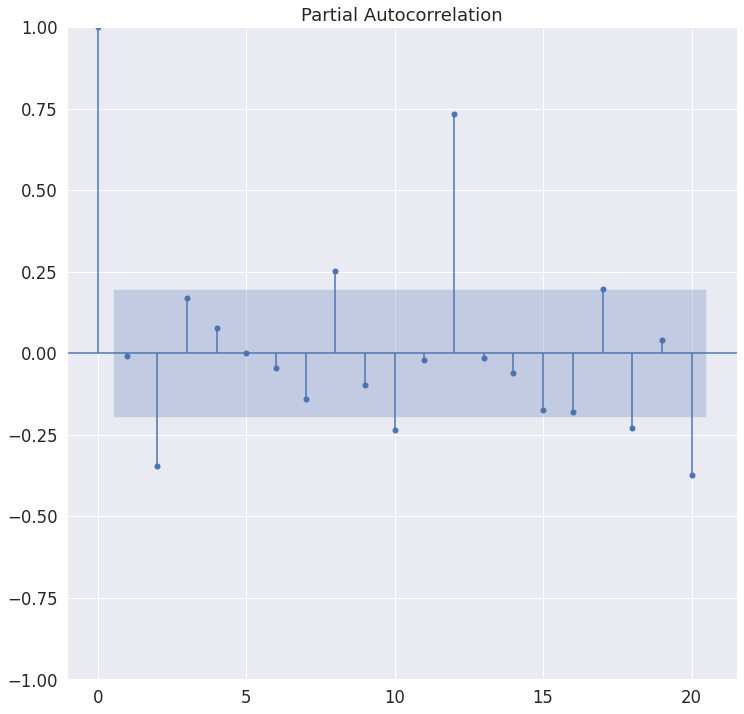

In [ ]:
plot_pacf(df_7_ord_1).set_size_inches(12,12);

In [ ]:
adf_test(df_7_ord_1)

Results of Dickey-Fuller Test:
Test Statistic                 -0.681461
p-value                         0.851493
#Lags Used                     11.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


dari uji fuller data belum stationer sehingga perlu dilakukan differencing orde 2

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

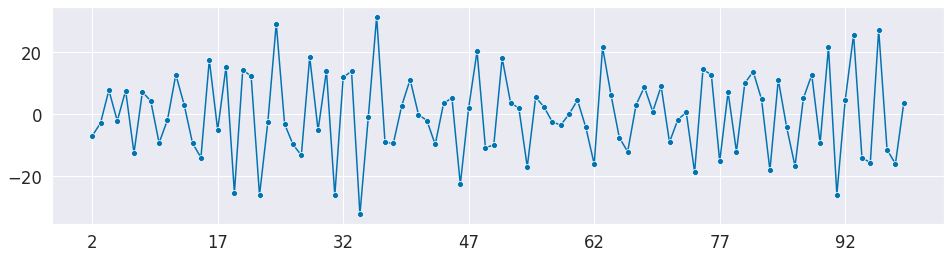

In [ ]:
df_7_ord_2 = df_7_ord_1.diff().dropna()

plot_series(df_7_ord_2)

In [ ]:
adf_test(df_7_ord_2)

Results of Dickey-Fuller Test:
Test Statistic                -1.001806e+01
p-value                        1.707861e-17
#Lags Used                     1.000000e+01
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


dengan melakukan differencing orde 2, data telah stationer berdasarkan uji dicky fuller

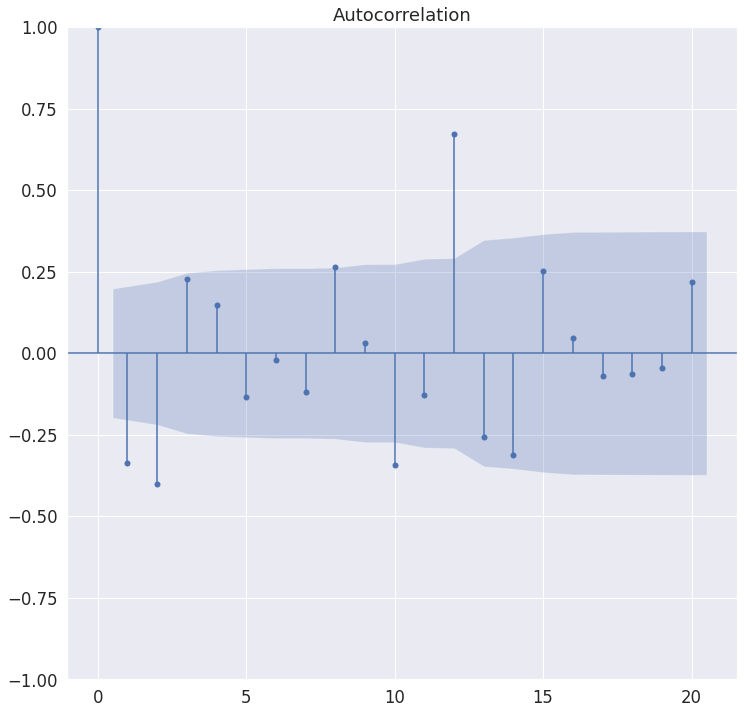

In [ ]:
plot_acf(df_7_ord_2).set_size_inches(12,12);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


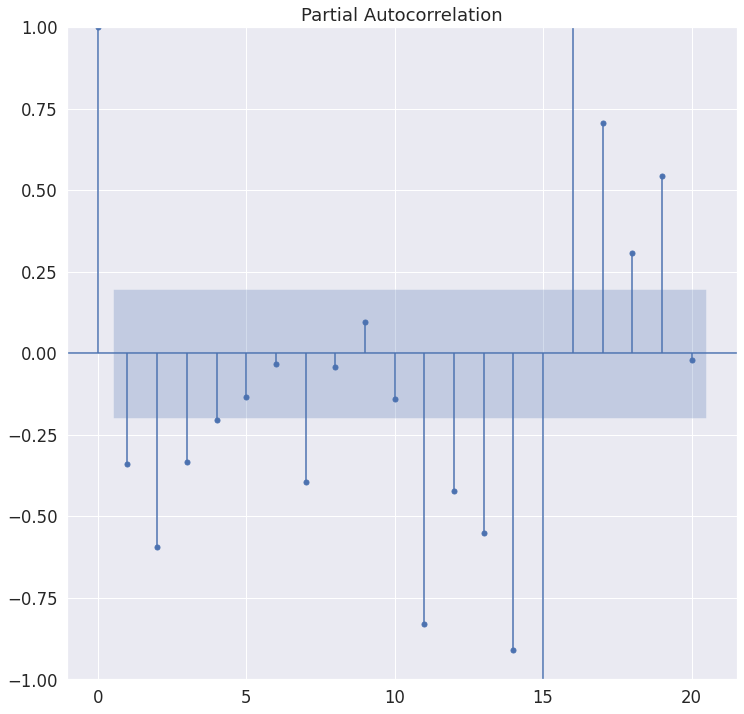

In [ ]:
plot_pacf(df_7_ord_2).set_size_inches(12,12);

dari hasil acf korelasi terjadi pada lag 2 dan pacf korelasi terjadi pada lag 4 sehingga model yang sesuai adalah ARIMA(4,2,2)

# Data 8

In [ ]:
df_8 = df_8.drop("index",axis=1)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

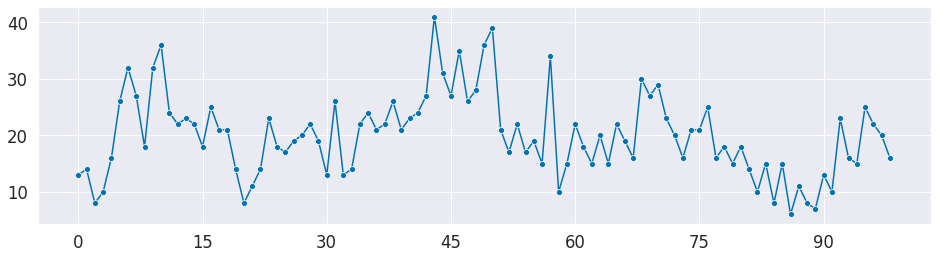

In [ ]:
plot_series(df_8)

In [ ]:
adf_test(df_8)

Results of Dickey-Fuller Test:
Test Statistic                 -3.183192
p-value                         0.020978
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


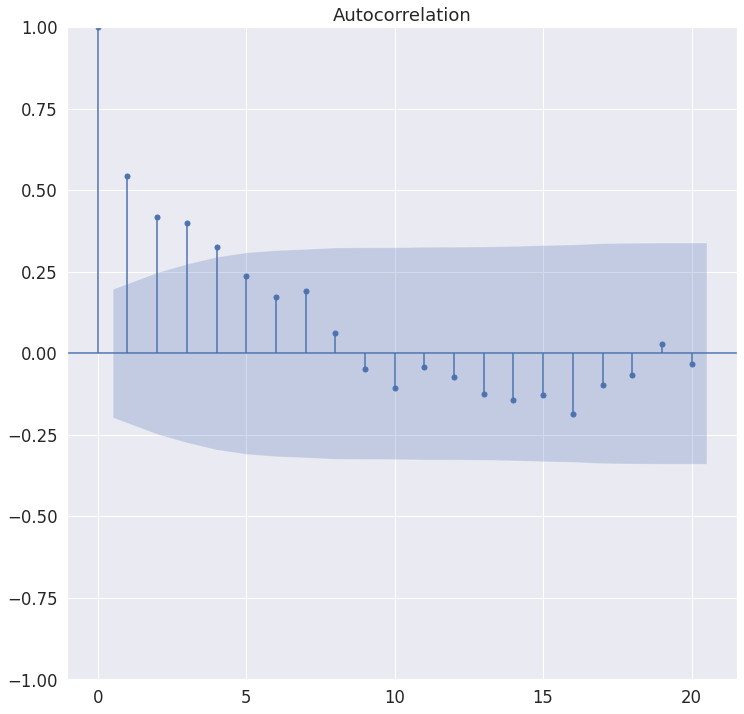

In [ ]:
plot_acf(df_8).set_size_inches(12,12)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


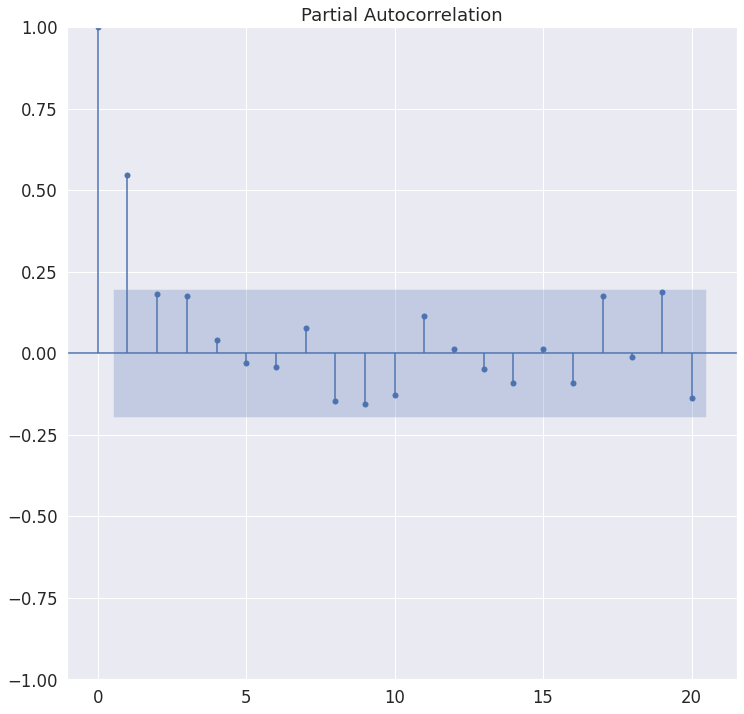

In [ ]:
plot_pacf(df_8).set_size_inches(12,12)

Observasi <br>
1.trend data telah stationer berdasarkan uji dicky fuller da terlihat adanha pola seasonal<br>
2.terdapat pola exponencial decay pada acf sehingga dapat diabaikan, sedangkan plot pacf tidak menunjukkan pola tertentu dan memiliki korelasi pada lag 1 sehingga model yang sesuai adalah AR(1)

# Data 9

In [ ]:
df_9 = df_9.drop("index",axis=1)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

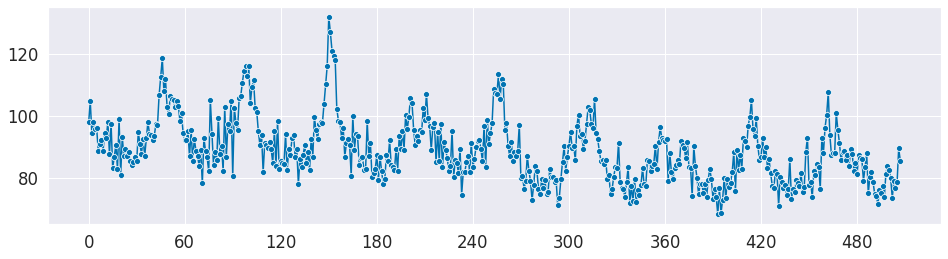

In [ ]:
plot_series(df_9)

In [ ]:
adf_test(df_9)

Results of Dickey-Fuller Test:
Test Statistic                  -4.815688
p-value                          0.000051
#Lags Used                       1.000000
Number of Observations Used    506.000000
Critical Value (1%)             -3.443340
Critical Value (5%)             -2.867269
Critical Value (10%)            -2.569821
dtype: float64


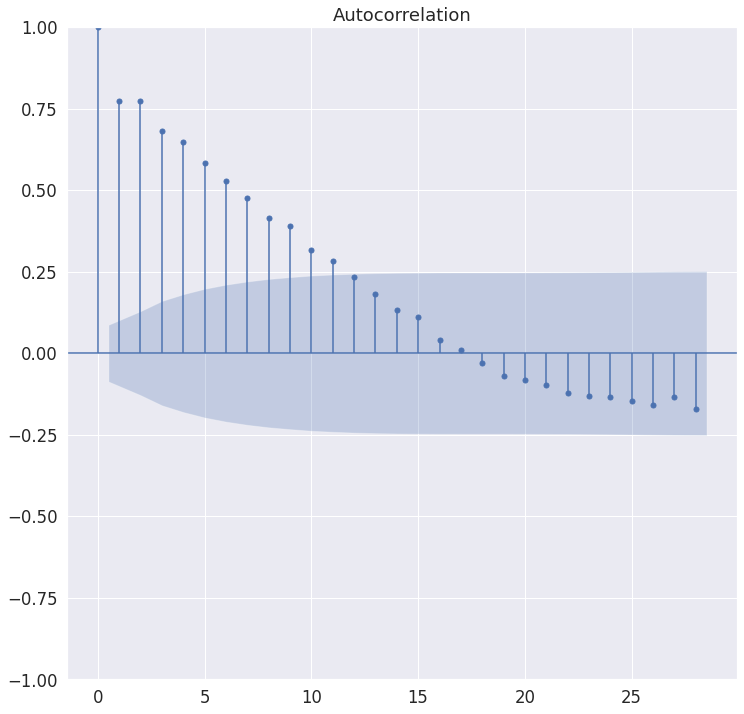

In [ ]:
plot_acf(df_9).set_size_inches(12,12)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


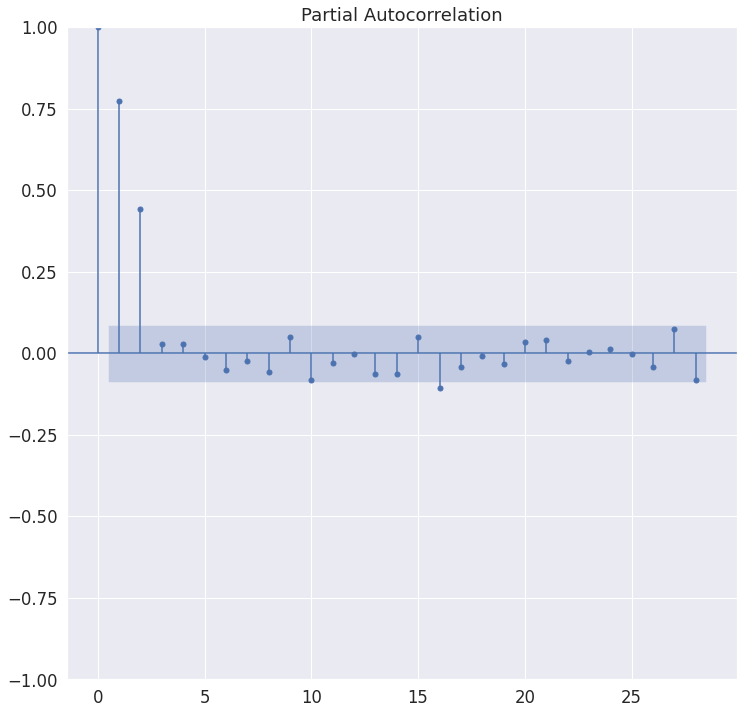

In [ ]:
plot_pacf(df_9).set_size_inches(12,12)

Observasi <br>
1.trend telah stationer berdasarkan uji fuller dan terdapat pola seasonal<br>
2.terdapat pola exponensial decay pada plot acf sehingga dapat diabaikan,sedangkan pada plot pacf tidak menunjukkan adanya pola tertentu dan memiliki korelasi pada lag 2, sehingga model yang sesuai adanya AR(2)

# Data 10

In [ ]:
df_10 = df_10.drop("index",axis=1)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

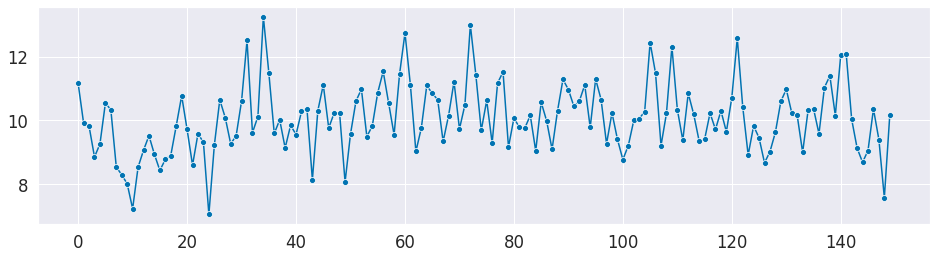

In [ ]:
plot_series(df_10)

In [ ]:
adf_test(df_10)

Results of Dickey-Fuller Test:
Test Statistic                  -4.112777
p-value                          0.000922
#Lags Used                       5.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


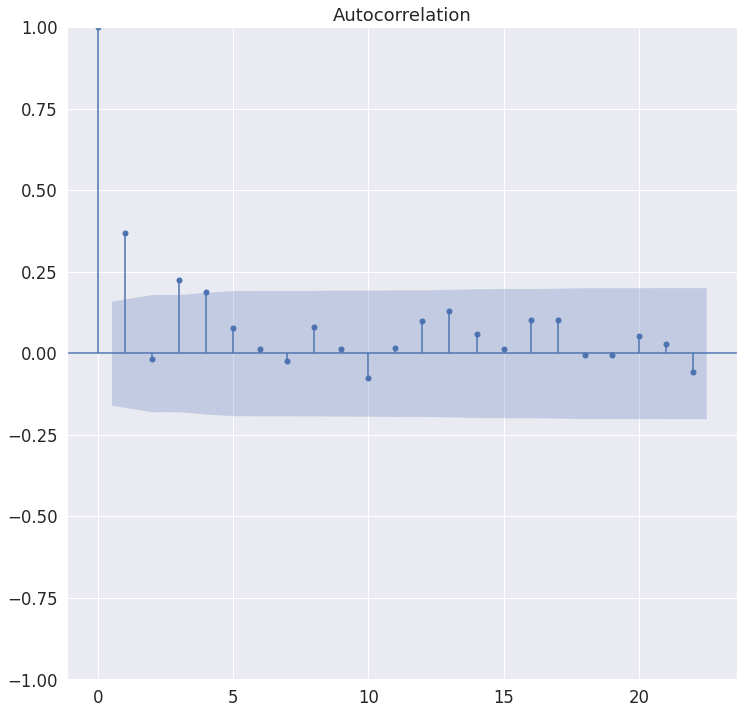

In [ ]:
plot_acf(df_10).set_size_inches(12,12)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


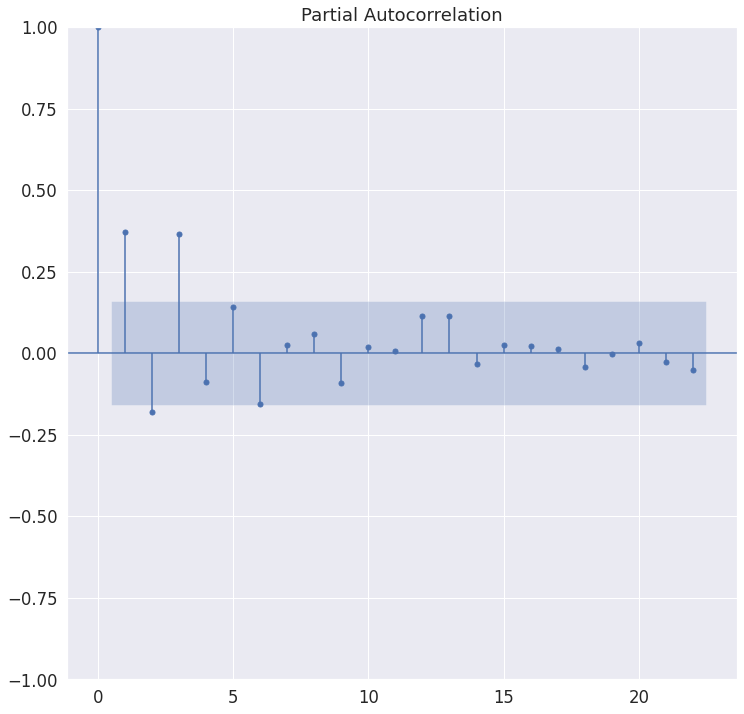

In [ ]:
plot_pacf(df_10).set_size_inches(12,12)

1.data telah staioner dan terdapat pola sesaonal <br>
2.berdasarkan plot acf terdapat korelasi pada lag 1 dan terdapat pola sinusoidal dumped pada plot pacf sehingga dapat diabaikan, sehingga model yang cocok adalah MA(1)